Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../../data/thread_ring/3/'

N = 100_000
R = 1_000_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}3/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}3/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}3/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}3/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 12:38:36 2025 +0200) (508.65ms elap...,2.090,1.6900,0.987,4.87,0.69,36.16,54.93 C,Nominal
1,(Sat Apr 5 12:38:36 2025 +0200) (508.00ms elap...,0.564,0.0529,0.555,1.26,0.39,20.57,54.58 C,Nominal
2,(Sat Apr 5 12:38:37 2025 +0200) (506.06ms elap...,1.300,0.0807,0.558,2.05,0.38,24.19,54.58 C,Nominal
3,(Sat Apr 5 12:38:37 2025 +0200) (508.95ms elap...,0.260,0.0258,0.420,0.88,0.17,11.96,54.21 C,Nominal
4,(Sat Apr 5 12:38:38 2025 +0200) (509.33ms elap...,0.311,0.0241,0.417,0.92,0.22,14.70,54.21 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(4962, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 12:38:47 2025 +0200) (1008.09ms ela...,39.1,0.0681,1.130,42.35,3.91,98.70,56.99 C,Nominal
1,(Sat Apr 5 12:38:48 2025 +0200) (1004.27ms ela...,36.2,0.0473,0.716,39.12,3.81,98.42,60.41 C,Nominal
2,(Sat Apr 5 12:38:49 2025 +0200) (1004.20ms ela...,36.7,0.0426,0.726,39.75,3.85,98.61,63.11 C,Nominal
3,(Sat Apr 5 12:38:50 2025 +0200) (1004.18ms ela...,37.6,0.0565,0.838,40.78,3.90,98.39,66.06 C,Nominal
4,(Sat Apr 5 12:38:51 2025 +0200) (1004.17ms ela...,36.3,0.0602,0.707,39.30,3.78,96.77,68.05 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 10:57:55 2025 +0200) (509.54ms elap...,2.1200,0.0247,0.392,2.38,0.31,20.64,50.26 C,Nominal
1,(Sat Apr 5 10:57:55 2025 +0200) (508.05ms elap...,0.1500,0.0336,0.412,0.52,0.08,5.76,50.37 C,Nominal
2,(Sat Apr 5 10:57:56 2025 +0200) (507.30ms elap...,1.1800,0.0000,0.289,1.32,0.19,15.18,50.37 C,Nominal
3,(Sat Apr 5 10:57:56 2025 +0200) (508.64ms elap...,0.0517,0.0000,0.272,0.31,0.03,2.18,50.53 C,Nominal
4,(Sat Apr 5 10:57:57 2025 +0200) (509.21ms elap...,0.1020,0.0000,0.268,0.34,0.06,4.21,50.58 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(5721, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 10:58:07 2025 +0200) (1008.77ms ela...,12.20,0.00000,1.08,13.23,1.47,99.31,51.33 C,Nominal
1,(Sat Apr 5 10:58:08 2025 +0200) (1006.83ms ela...,9.91,0.00000,1.30,11.05,1.01,99.41,52.87 C,Nominal
2,(Sat Apr 5 10:58:09 2025 +0200) (1006.22ms ela...,10.70,0.00000,1.09,11.73,1.18,98.69,54.57 C,Nominal
3,(Sat Apr 5 10:58:10 2025 +0200) (1007.05ms ela...,9.75,0.00000,1.26,12.08,1.05,99.52,55.86 C,Nominal
4,(Sat Apr 5 10:58:11 2025 +0200) (1006.64ms ela...,10.20,0.00164,1.15,13.34,1.03,99.30,56.88 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 12:38:36,2.090,1.6900,0.987,4.87,0.69,36.16,54.93,Nominal,508.65
1,2025-04-05 12:38:36,0.564,0.0529,0.555,1.26,0.39,20.57,54.58,Nominal,508.00
2,2025-04-05 12:38:37,1.300,0.0807,0.558,2.05,0.38,24.19,54.58,Nominal,506.06
3,2025-04-05 12:38:37,0.260,0.0258,0.420,0.88,0.17,11.96,54.21,Nominal,508.95
4,2025-04-05 12:38:38,0.311,0.0241,0.417,0.92,0.22,14.70,54.21,Nominal,509.33


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(4962, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 12:38:47,39.1,0.0681,1.130,42.35,3.91,98.70,56.99,Nominal,1008.09
1,2025-04-05 12:38:48,36.2,0.0473,0.716,39.12,3.81,98.42,60.41,Nominal,1004.27
2,2025-04-05 12:38:49,36.7,0.0426,0.726,39.75,3.85,98.61,63.11,Nominal,1004.20
3,2025-04-05 12:38:50,37.6,0.0565,0.838,40.78,3.90,98.39,66.06,Nominal,1004.18
4,2025-04-05 12:38:51,36.3,0.0602,0.707,39.30,3.78,96.77,68.05,Nominal,1004.17


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 10:57:55,2.1200,0.0247,0.392,2.38,0.31,20.64,50.26,Nominal,509.54
1,2025-04-05 10:57:55,0.1500,0.0336,0.412,0.52,0.08,5.76,50.37,Nominal,508.05
2,2025-04-05 10:57:56,1.1800,0.0000,0.289,1.32,0.19,15.18,50.37,Nominal,507.30
3,2025-04-05 10:57:56,0.0517,0.0000,0.272,0.31,0.03,2.18,50.53,Nominal,508.64
4,2025-04-05 10:57:57,0.1020,0.0000,0.268,0.34,0.06,4.21,50.58,Nominal,509.21


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(5721, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 10:58:07,12.20,0.00000,1.08,13.23,1.47,99.31,51.33,Nominal,1008.77
1,2025-04-05 10:58:08,9.91,0.00000,1.30,11.05,1.01,99.41,52.87,Nominal,1006.83
2,2025-04-05 10:58:09,10.70,0.00000,1.09,11.73,1.18,98.69,54.57,Nominal,1006.22
3,2025-04-05 10:58:10,9.75,0.00000,1.26,12.08,1.05,99.52,55.86,Nominal,1007.05
4,2025-04-05 10:58:11,10.20,0.00164,1.15,13.34,1.03,99.30,56.88,Nominal,1006.64


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


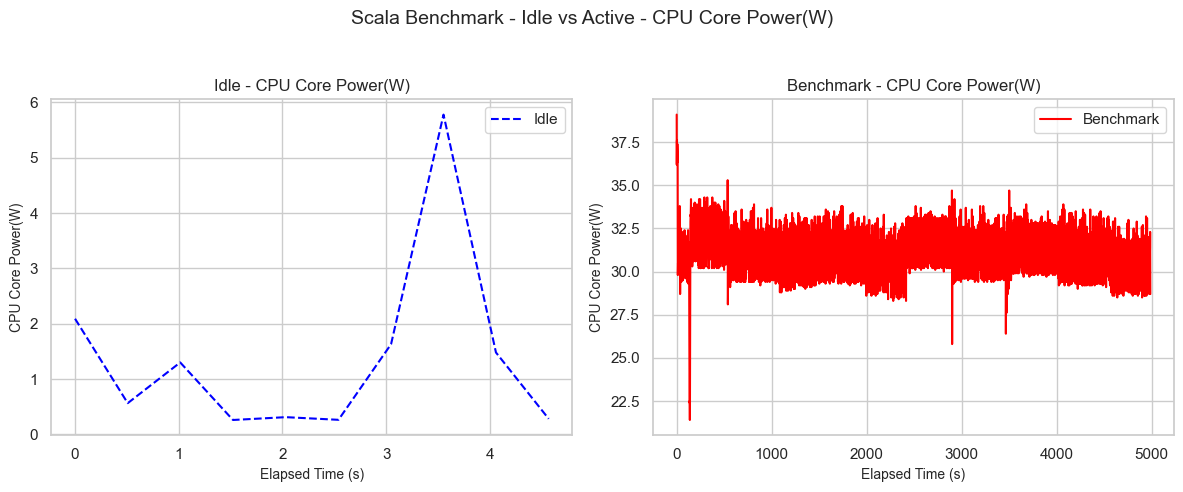

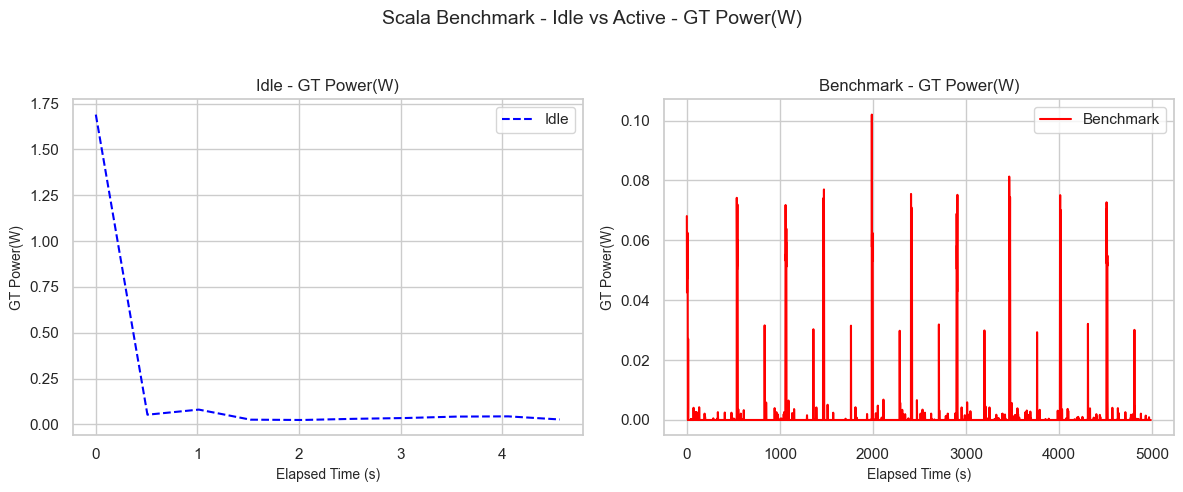

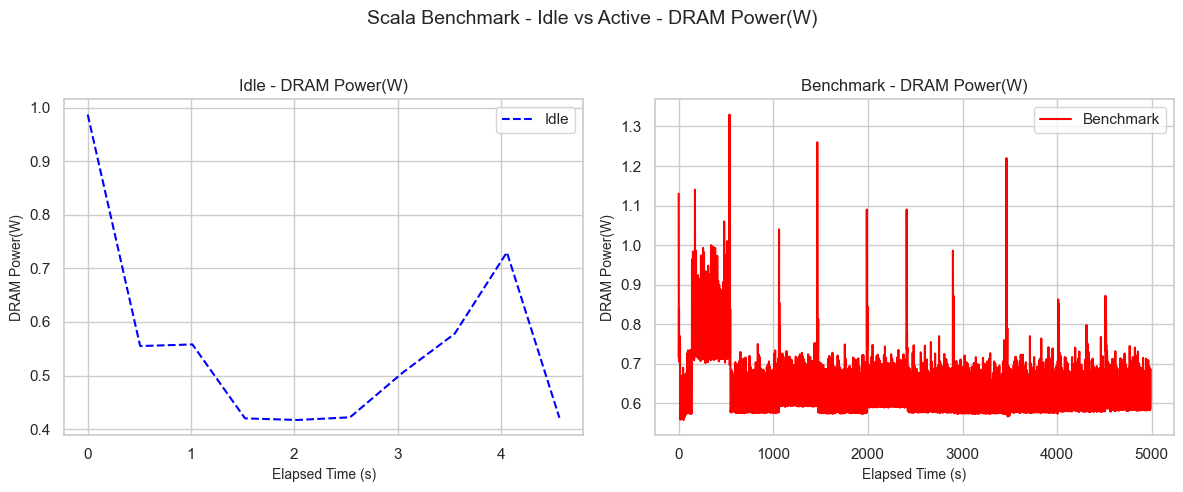

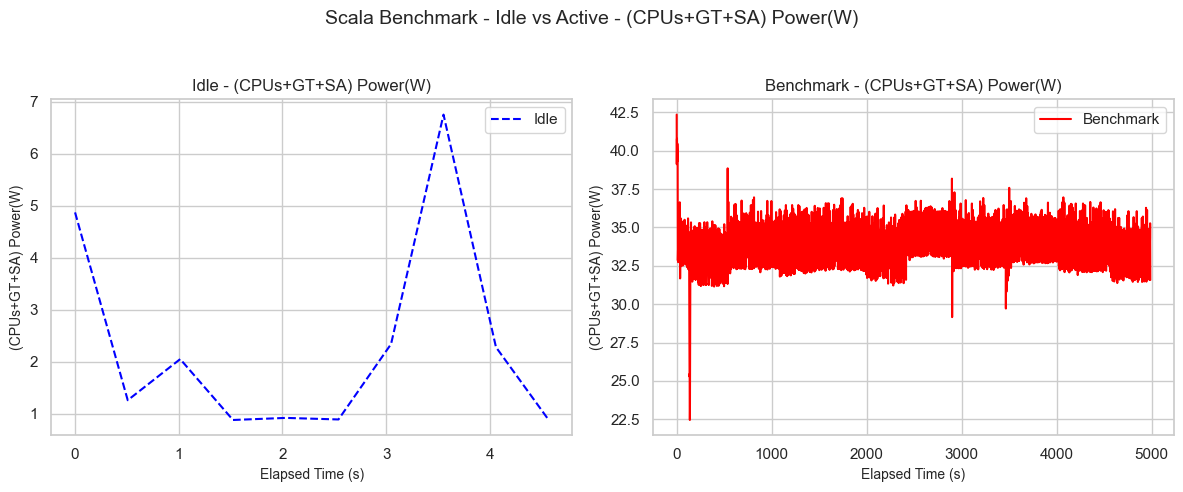

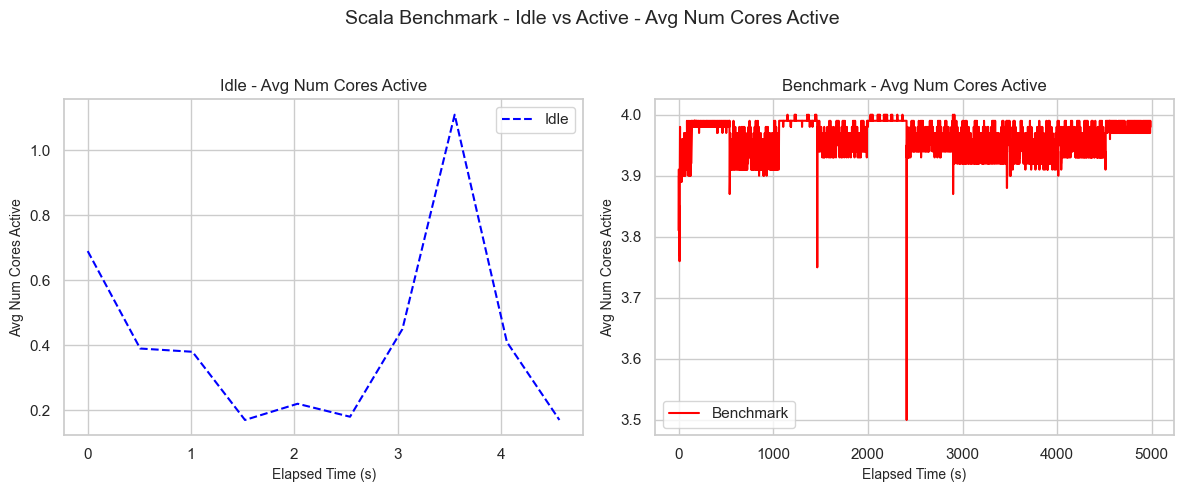

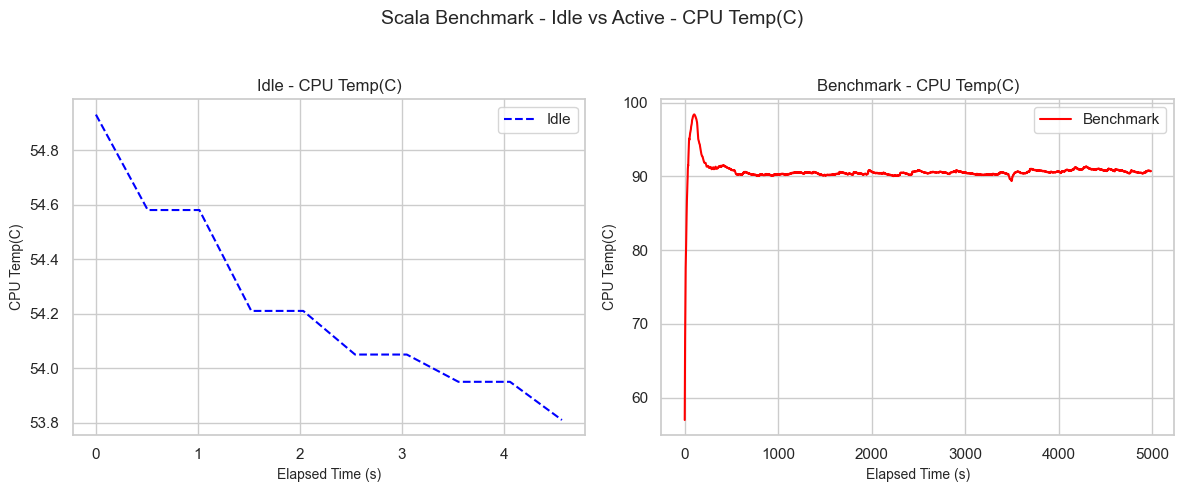

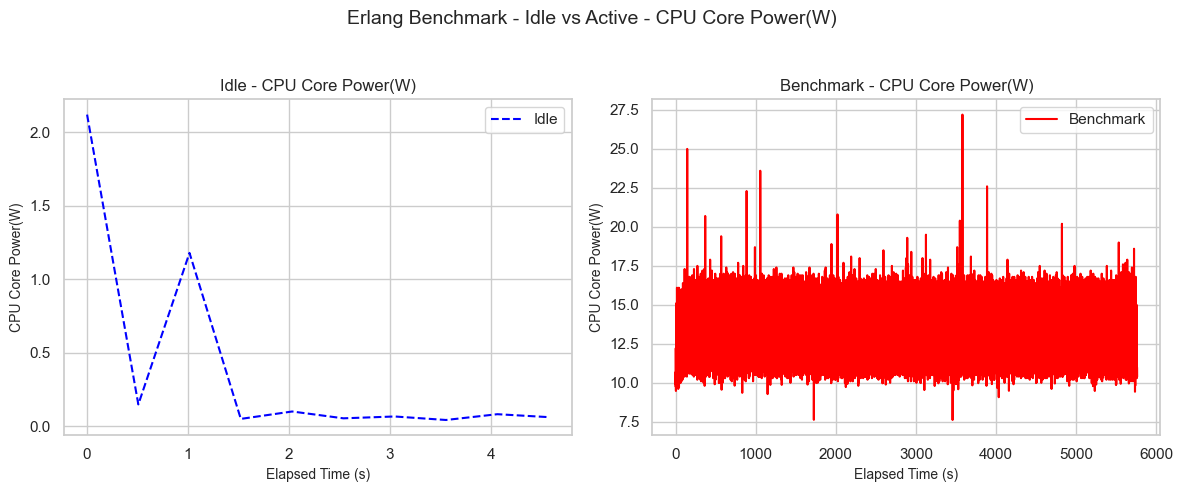

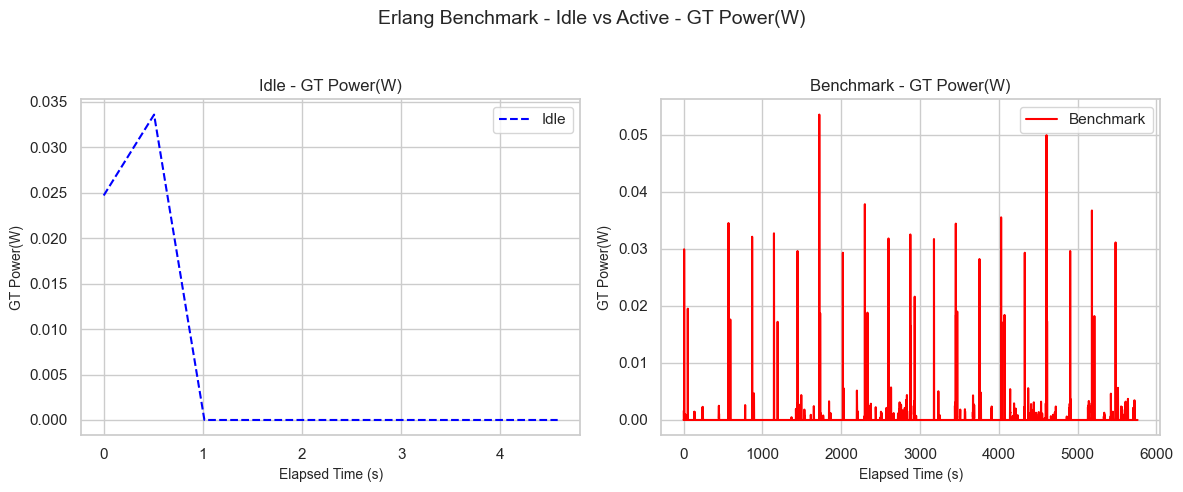

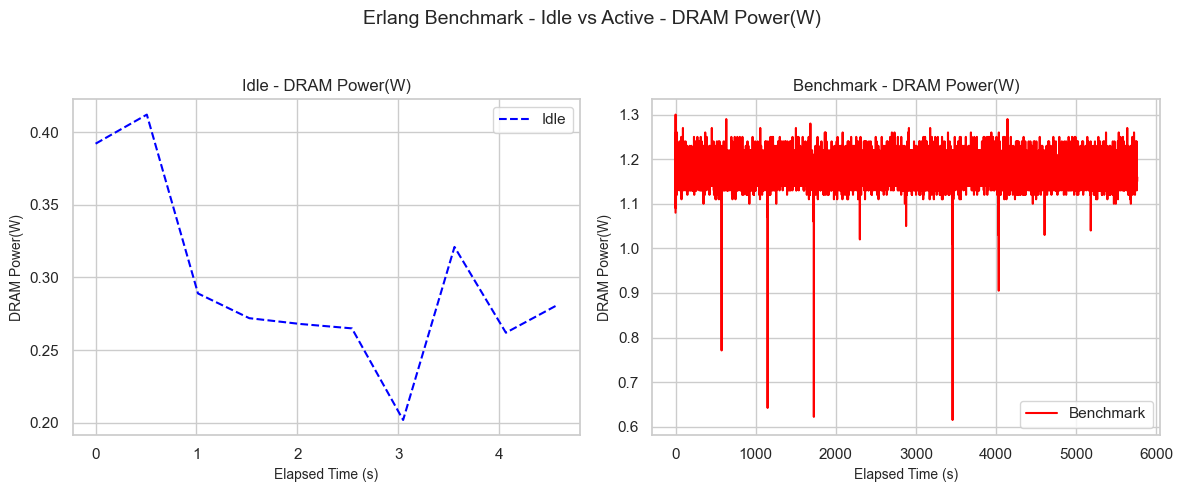

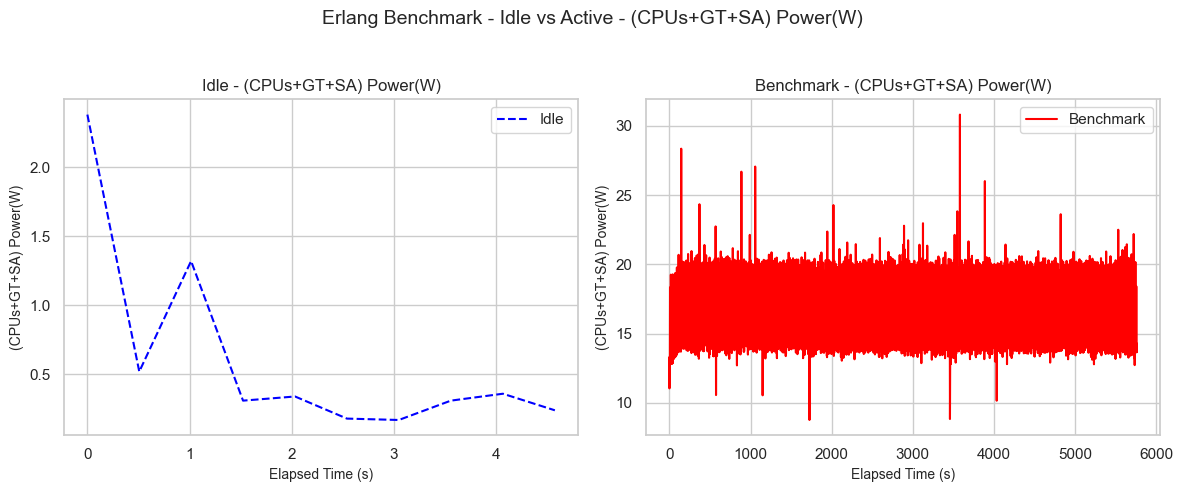

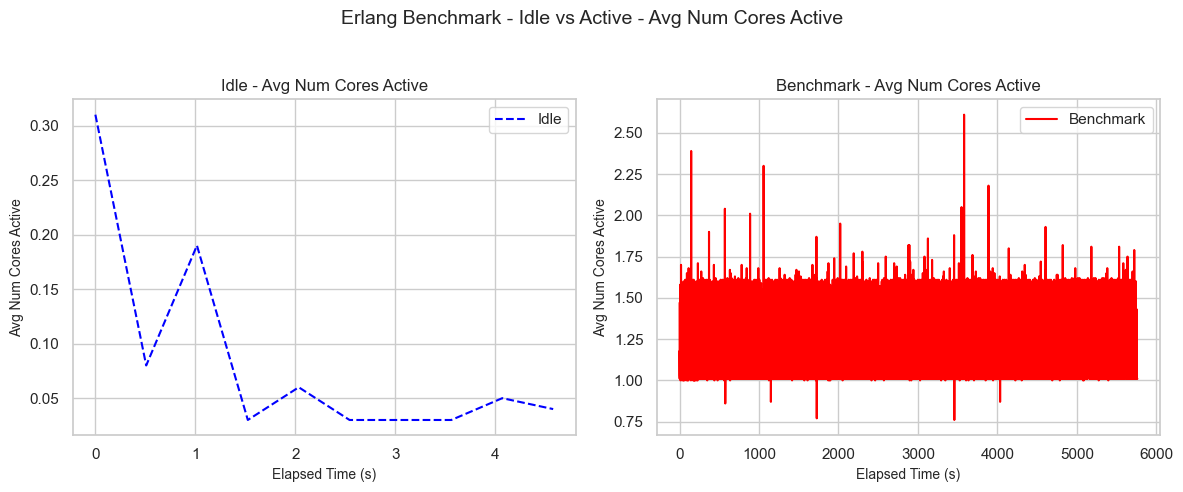

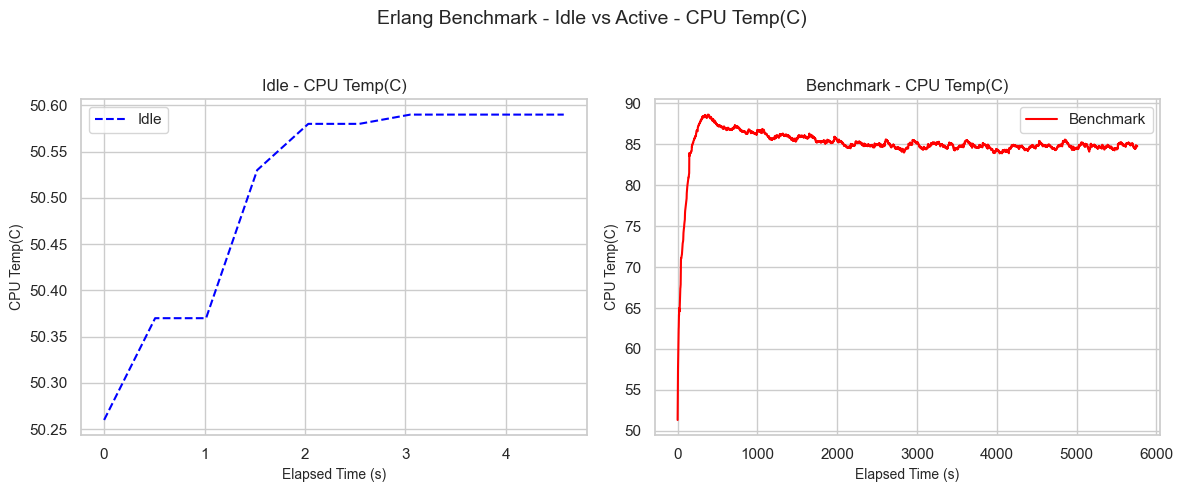

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

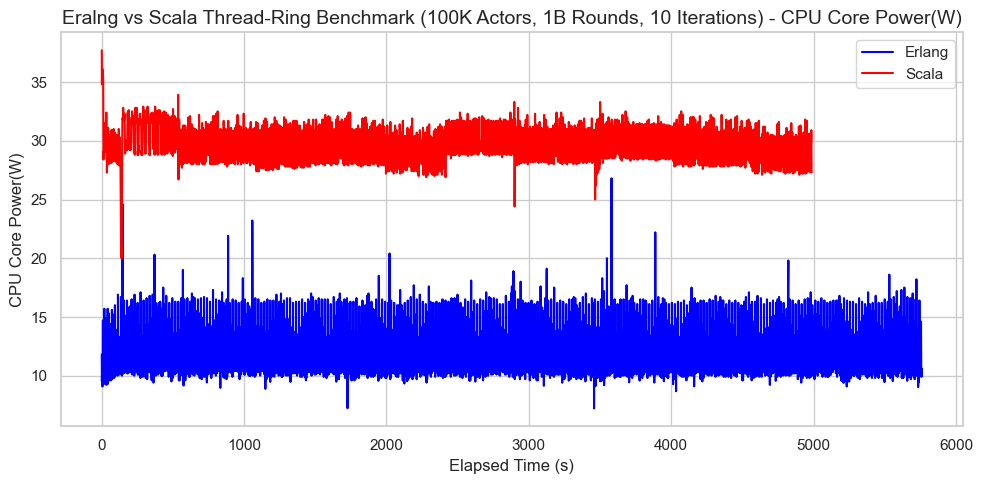

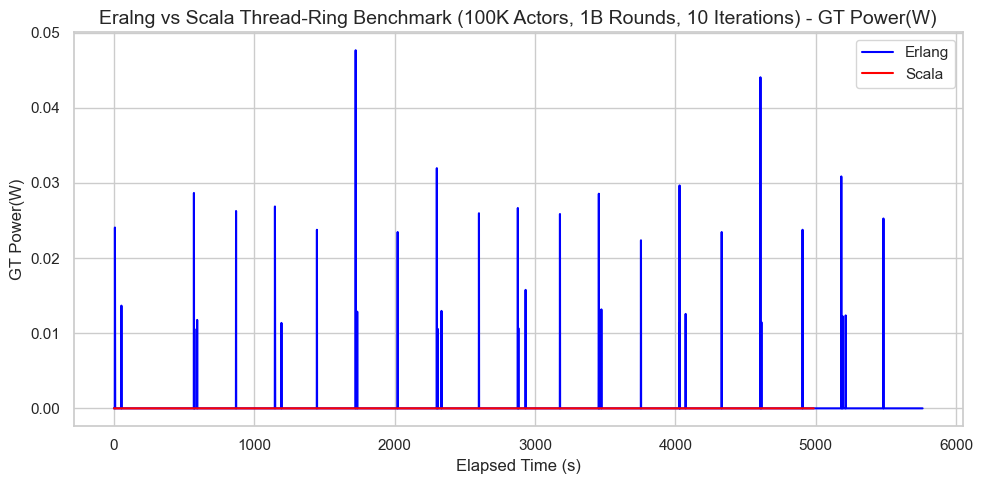

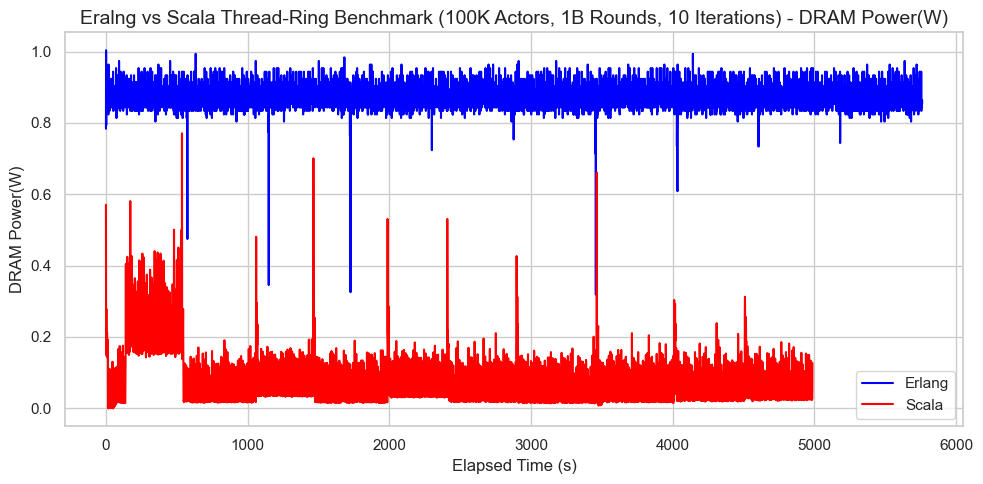

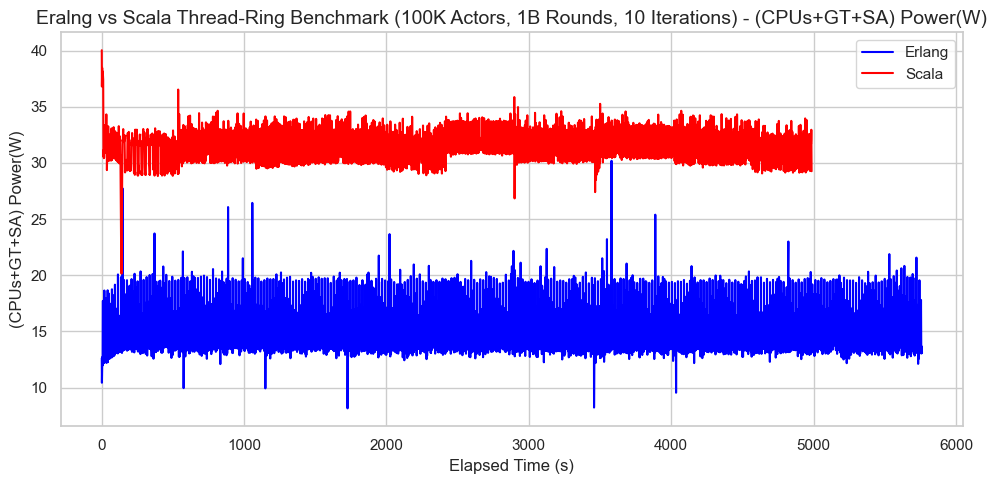

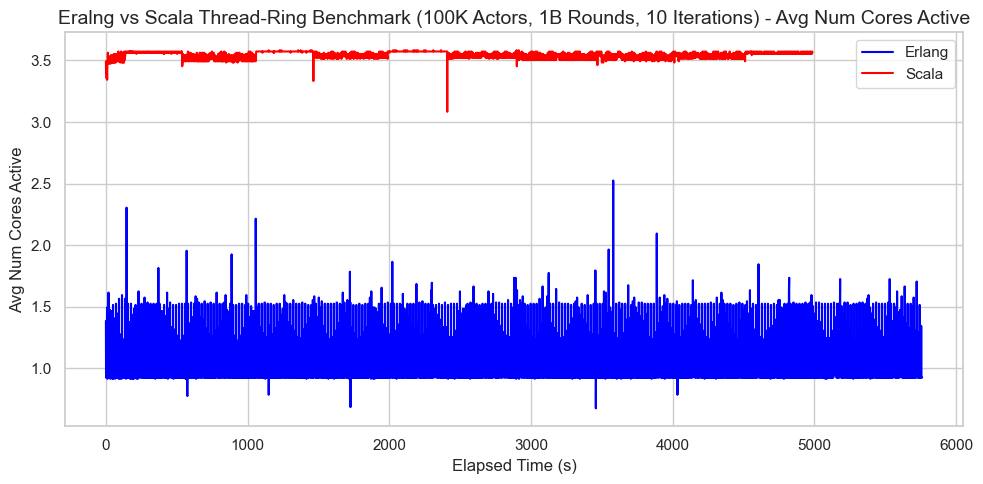

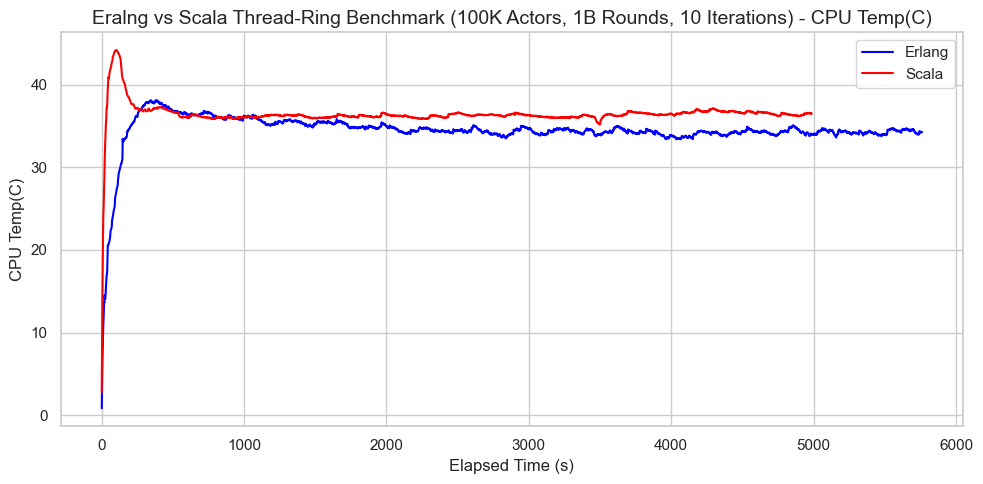

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        29.663350
GT Power(W)              -0.203773
DRAM Power(W)             0.061238
(CPUs+GT+SA) Power(W)    31.545729
CPU Temp(C)              36.429258
Avg Num Cores Active      3.537936
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        11.171436
GT Power(W)              -0.005581
DRAM Power(W)             0.870161
(CPUs+GT+SA) Power(W)    14.294764
CPU Temp(C)              34.461810
Avg Num Cores Active      1.006390
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/thread_ring/3/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 148241.88796581686 Joules
Erlang Benchmark: 69392.12639596665 Joules
